In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
data_src = r"E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\2024-01-19 17.36.03 vid\Allied Vision Technologies GS650 0001f61c\*tif"
frame_rate = 120
frame_limit = 10000

In [3]:
class ArrhythmicOpticalGating(OG.BasicOpticalGating):
    def __init__(self):
        super().__init__()
        self.arrhythmic_sads = []

    def set_arrhythmia_frames(self, early_frame, mid_frame, late_frame):
        print("Loading data...")
        self.arrhythmia_frames = tf.imread(r"E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\arrhythmic frames.tif")
        print("Data loaded.")

    def get_sads(self):
        print("Getting SADs")

        self.sads = []

        self.frame_means = []
        self.ref_means = []

        while True:
            frame = self.sequence_manager.get_next_frame()
            if frame is None:
                break
            sad, frame_mean = self.get_sad(frame, self.sequence_manager.reference_sequence)
            self.sads.append(sad)
            self.frame_means.append(frame_mean)
            self.arrhythmic_sads.append(jps.sad_with_references(frame, self.arrhythmia_frames))


In [4]:
early_frame = 420
mid_frame = 1000
late_frame = 1500

In [5]:
oog = ArrhythmicOpticalGating()
oog.set_arrhythmia_frames(early_frame=400, mid_frame=1000, late_frame=1500)
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.max_frames = frame_limit
oog.run()

Loading data...
Data loaded.
Setting source to E:\data\my data\January 2024 Arrhythmic\Dosage tests\Caffeine\fish 2\post\early\2024-01-19 17.36.03 vid\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
Getting SADs
Getting phases


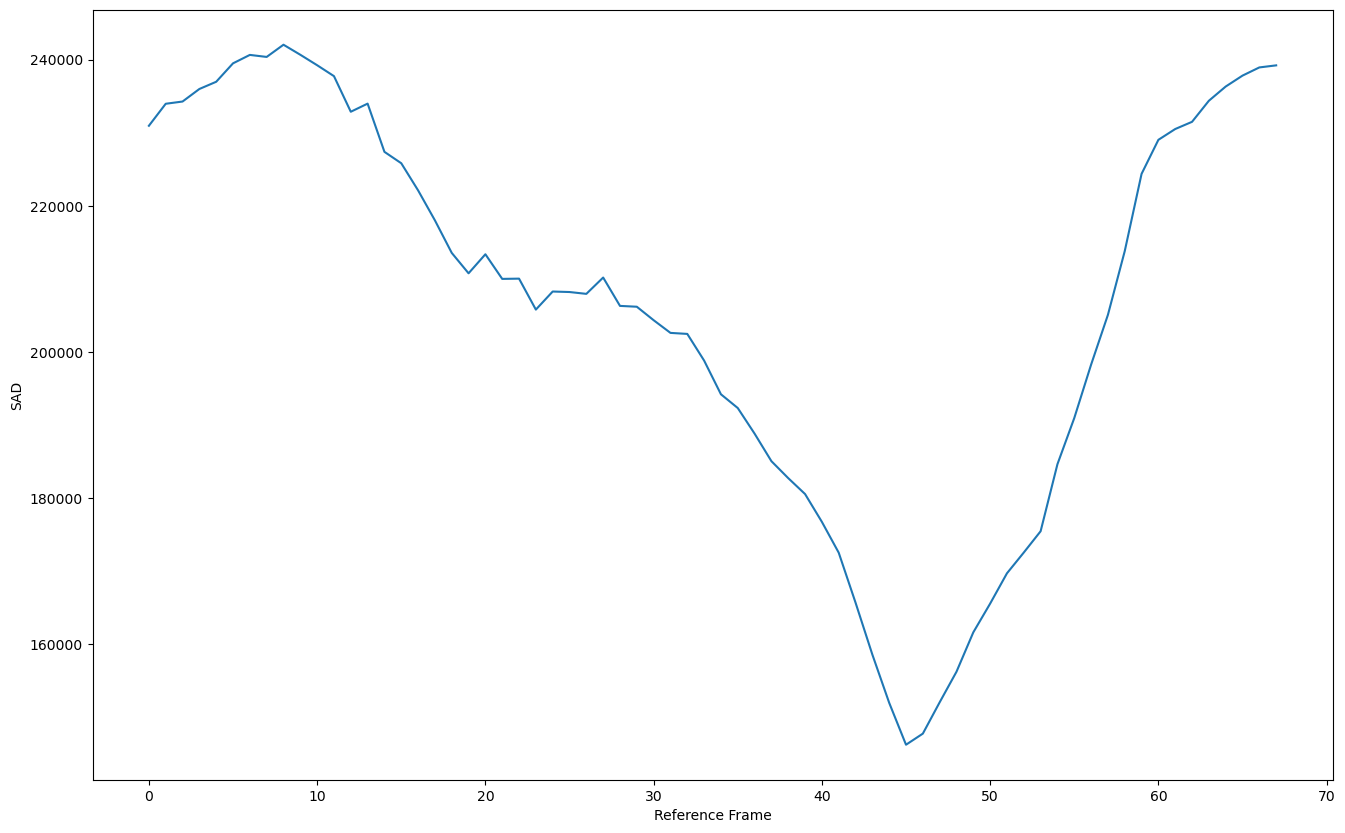

In [6]:
plt.figure(figsize = (16, 10))
plt.plot(oog.sads[0])
plt.xlabel("Reference Frame")
plt.ylabel("SAD")
plt.show()

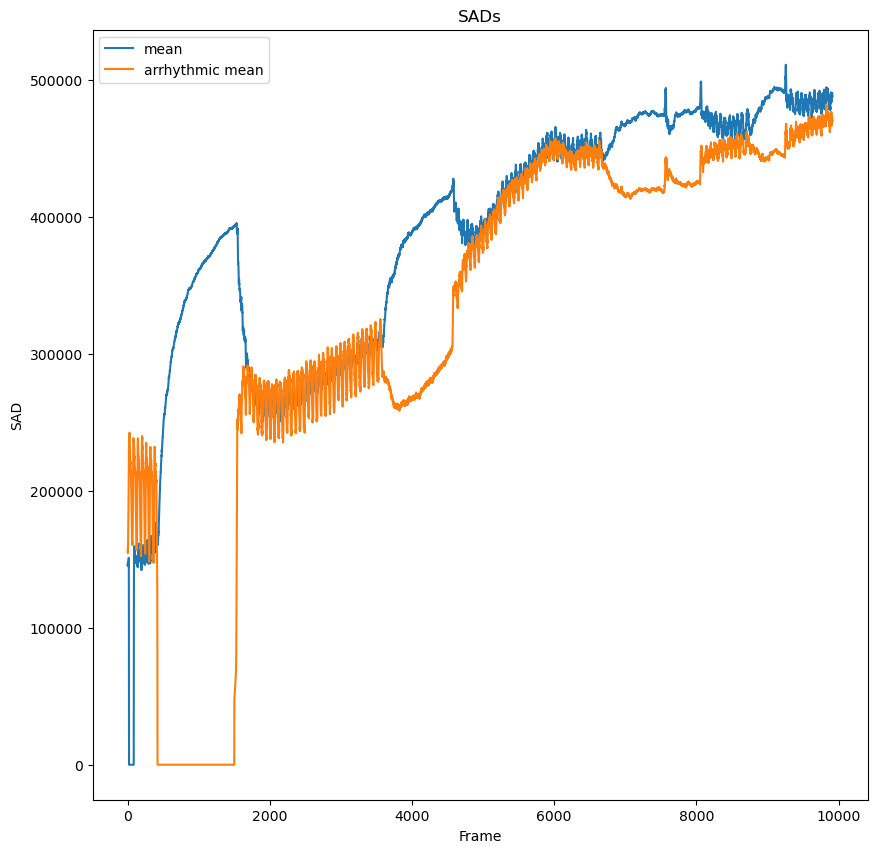

In [9]:
plt.figure(figsize = (10, 10))
plt.title("SADs")
plt.plot(np.min(oog.sads, axis=1), label="mean")
plt.plot(np.min(oog.arrhythmic_sads, axis=1), label = "arrhythmic mean")
plt.xlabel("Frame")
plt.ylabel("SAD")
plt.legend()
plt.show()

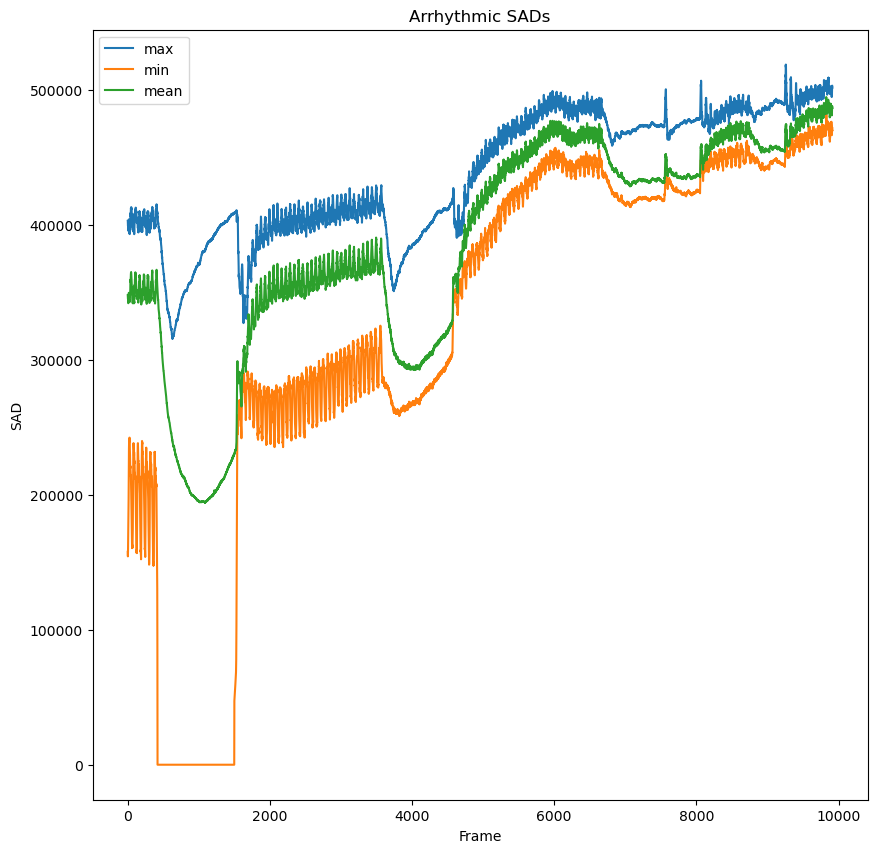

In [ ]:
plt.figure(figsize = (10, 10))
plt.title("Arrhythmic SADs")
plt.plot(np.max(oog.arrhythmic_sads, axis=1), label = "max")
plt.plot(np.min(oog.arrhythmic_sads, axis=1), label = "min")
plt.plot(np.mean(oog.arrhythmic_sads, axis=1), label = "mean")
plt.xlabel("Frame")
plt.ylabel("SAD")
plt.legend()
plt.show()

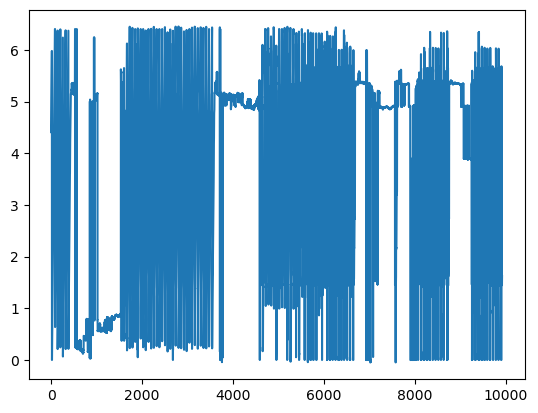

In [ ]:
plt.plot(range(oog.phases.shape[0]), oog.phases)

C:\Users\kross\AppData\Local\Temp\ipykernel_564\2247721718.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.min(oog.arrhythmic_sads, axis=1) / np.min(oog.sads, axis=1), label = "max ratio")


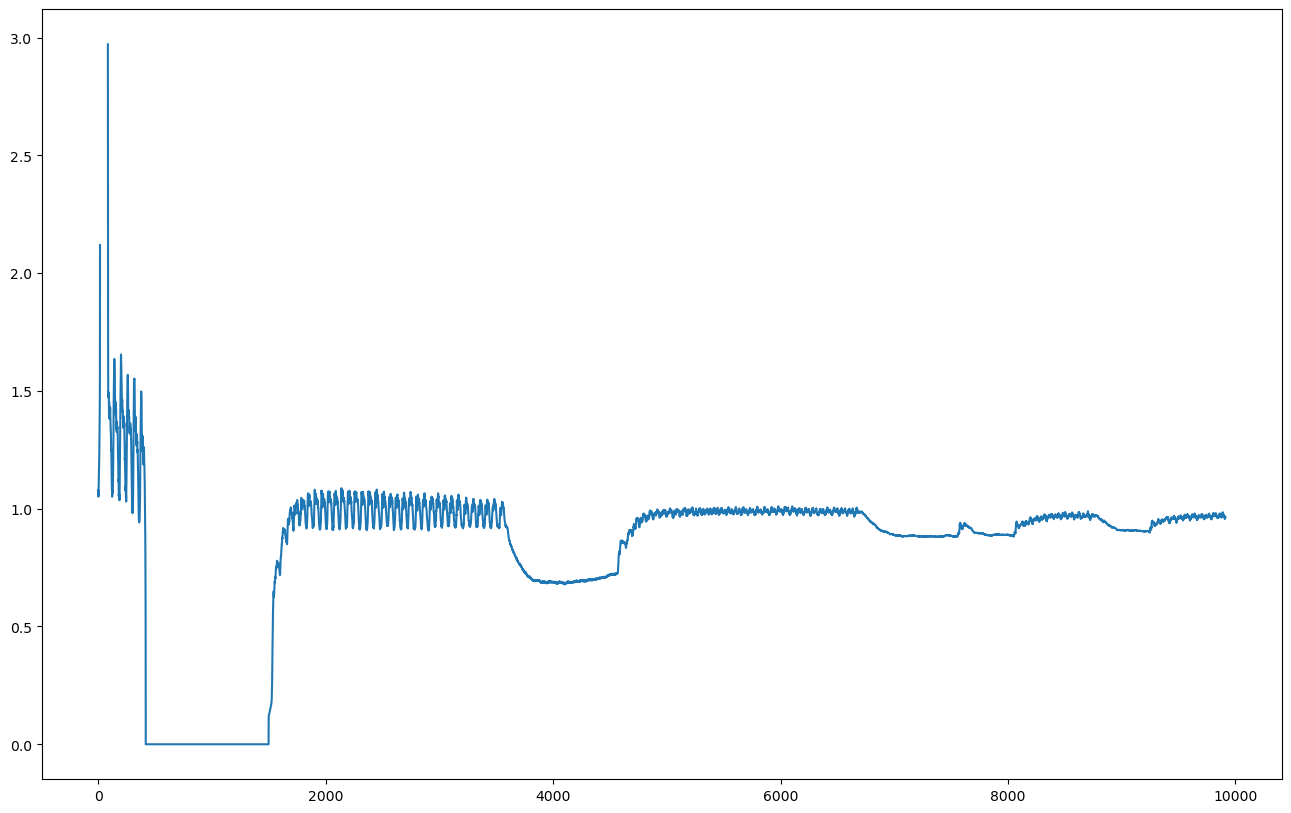

In [11]:
plt.figure(figsize = (16,10))
#plt.plot(range(oog.phases.shape[0]), (oog.phases - 3) / 70)
plt.plot(np.min(oog.arrhythmic_sads, axis=1) / np.min(oog.sads, axis=1), label = "max ratio")
plt.show()

C:\Users\kross\AppData\Local\Temp\ipykernel_5464\3167007810.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.min(oog.arrhythmic_sads, axis=1) / np.min(oog.sads, axis=1), label = "min ratio")


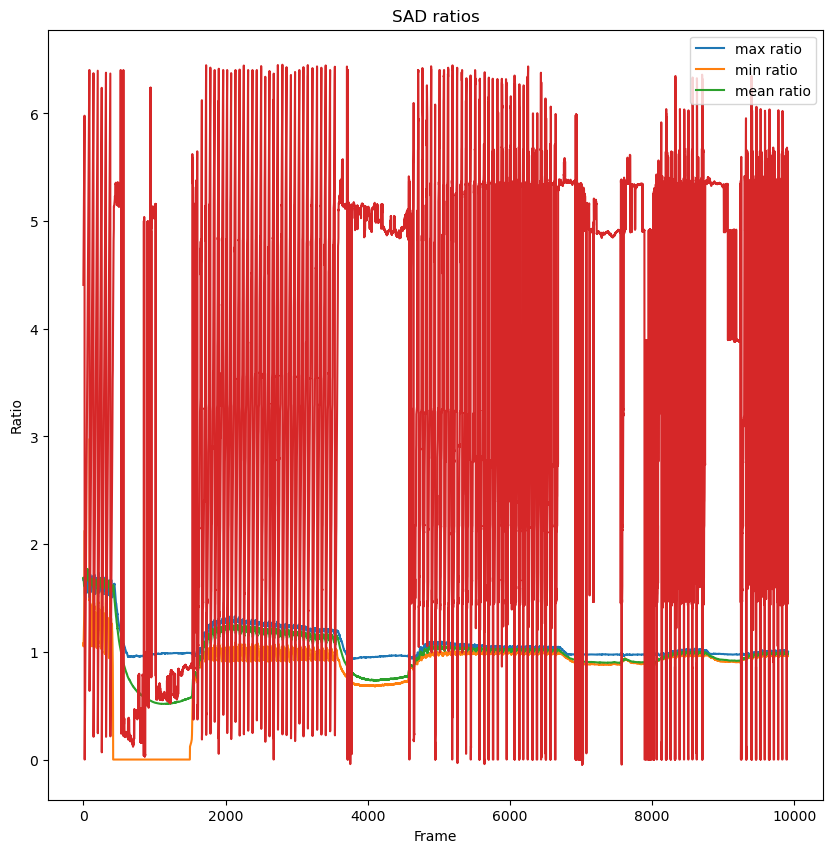

In [ ]:
plt.figure(figsize = (10, 10))
plt.title("SAD ratios")
plt.plot(np.max(oog.arrhythmic_sads, axis=1) / np.max(oog.sads, axis=1), label = "max ratio")
plt.plot(np.min(oog.arrhythmic_sads, axis=1) / np.min(oog.sads, axis=1), label = "min ratio")
plt.plot(np.mean(oog.arrhythmic_sads, axis=1) / np.mean(oog.sads, axis=1), label = "mean ratio")
plt.plot(range(oog.phases.shape[0]), oog.phases)
plt.xlabel("Frame")
plt.ylabel("Ratio")
plt.legend()
plt.show()

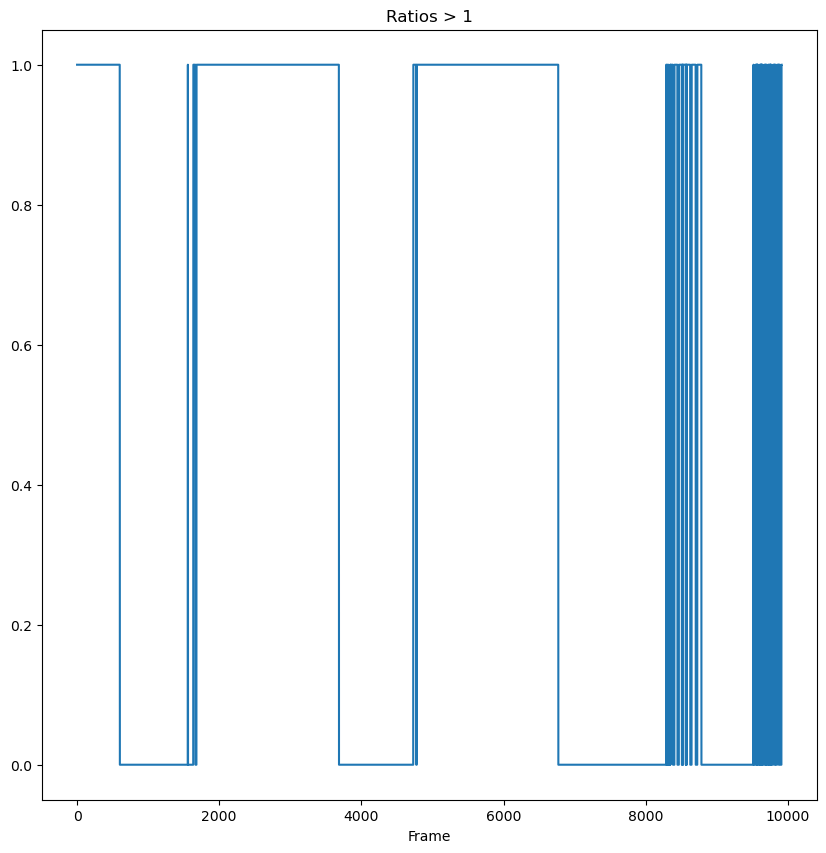

In [ ]:
plt.figure(figsize = (10, 10))
plt.title("Ratios > 1")
plt.plot(np.max(oog.arrhythmic_sads, axis=1) / np.max(oog.sads, axis=1) > 1)
plt.xlabel("Frame")
plt.show()

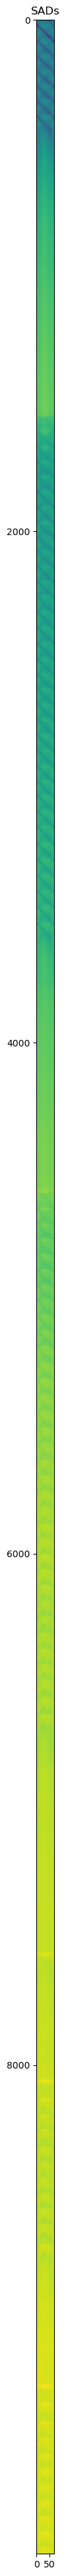

In [ ]:
plt.figure(figsize = (5,50))
plt.title("SADs")
plt.imshow(oog.sads)
plt.show()

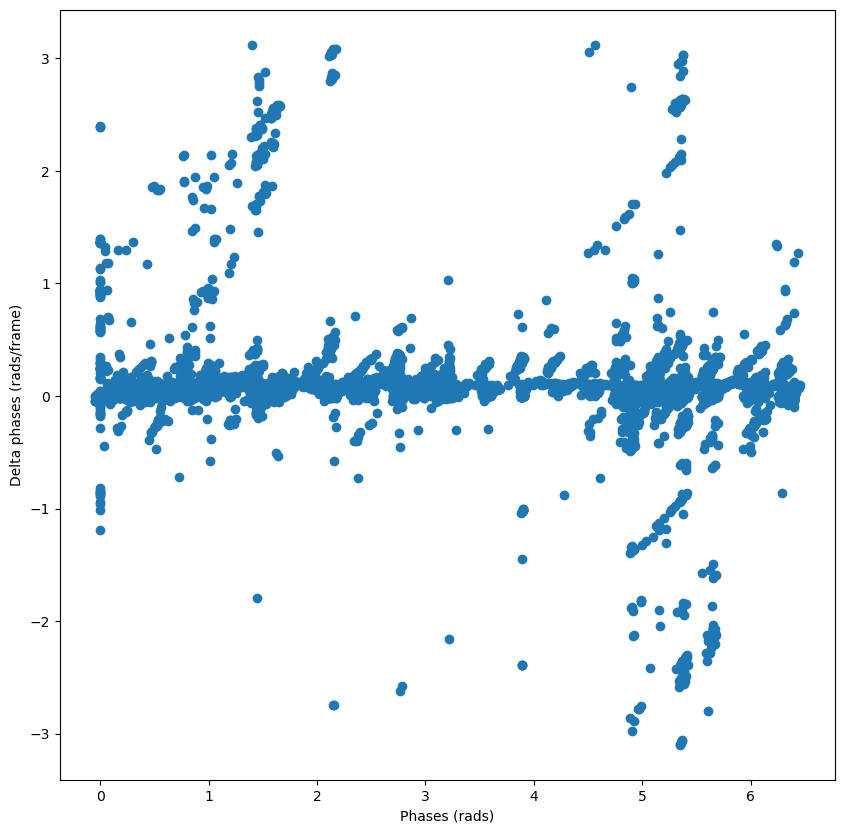

In [ ]:
plt.figure(figsize = (10, 10))
plt.scatter(oog.phases[1::], oog.delta_phases)
plt.xlabel("Phases (rads)")
plt.ylabel("Delta phases (rads/frame)")
plt.show()

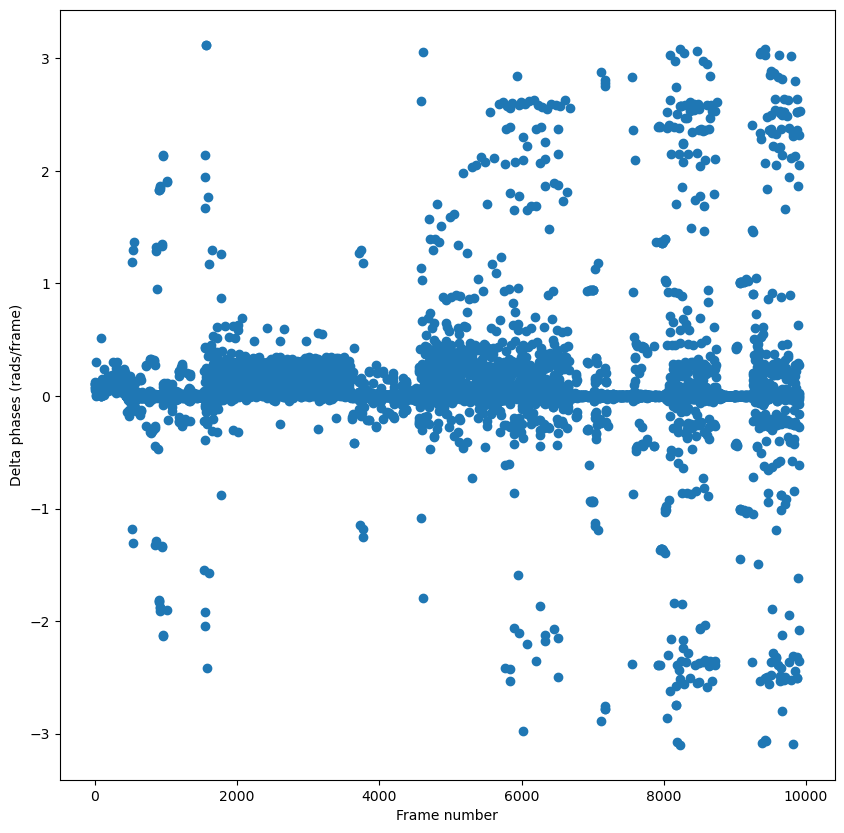

In [ ]:
plt.figure(figsize = (10, 10))
plt.scatter(range(len(oog.delta_phases)), oog.delta_phases)
plt.xlabel("Frame number")
plt.ylabel("Delta phases (rads/frame)")
plt.show()

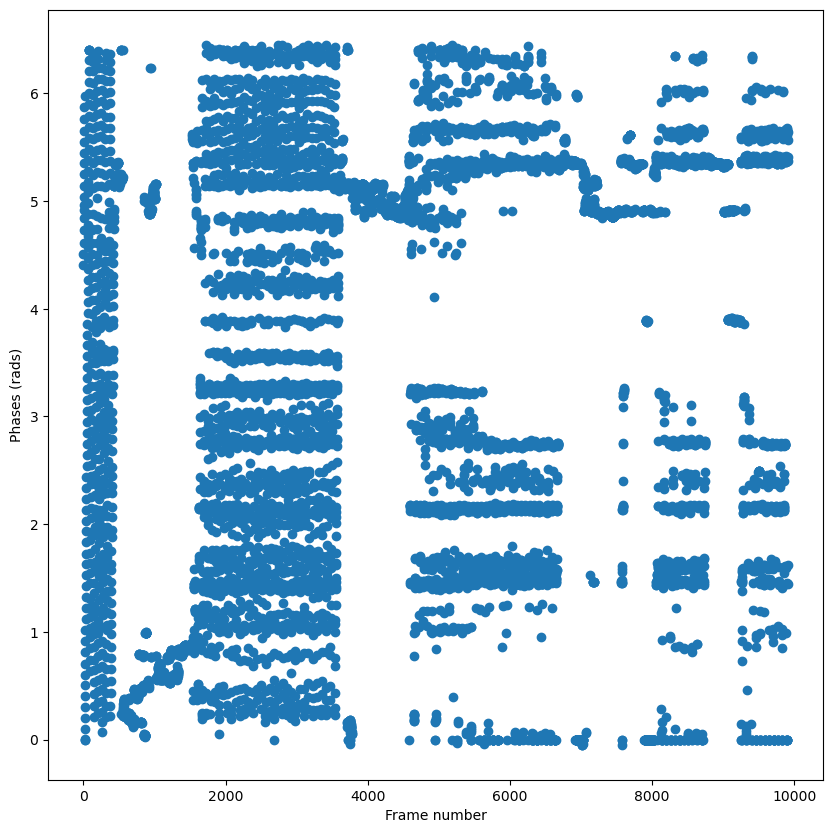

In [ ]:
plt.figure(figsize = (10, 10))
plt.scatter(range(len(oog.phases)), oog.phases)
plt.xlabel("Frame number")
plt.ylabel("Phases (rads)")
plt.show()

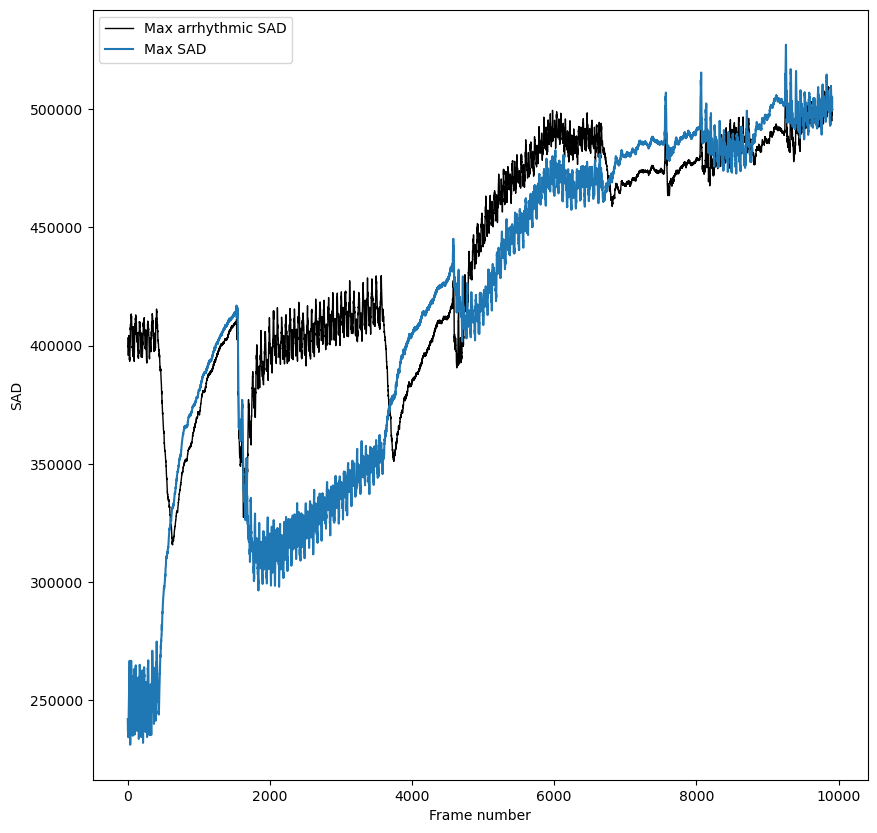

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(np.max(oog.arrhythmic_sads, axis = 1), c = "black", lw = 1, label = "Max arrhythmic SAD")
plt.plot(np.max(oog.sads, axis = 1), label = "Max SAD")
plt.xlabel("Frame number")
plt.ylabel("SAD")
plt.legend()
plt.show()

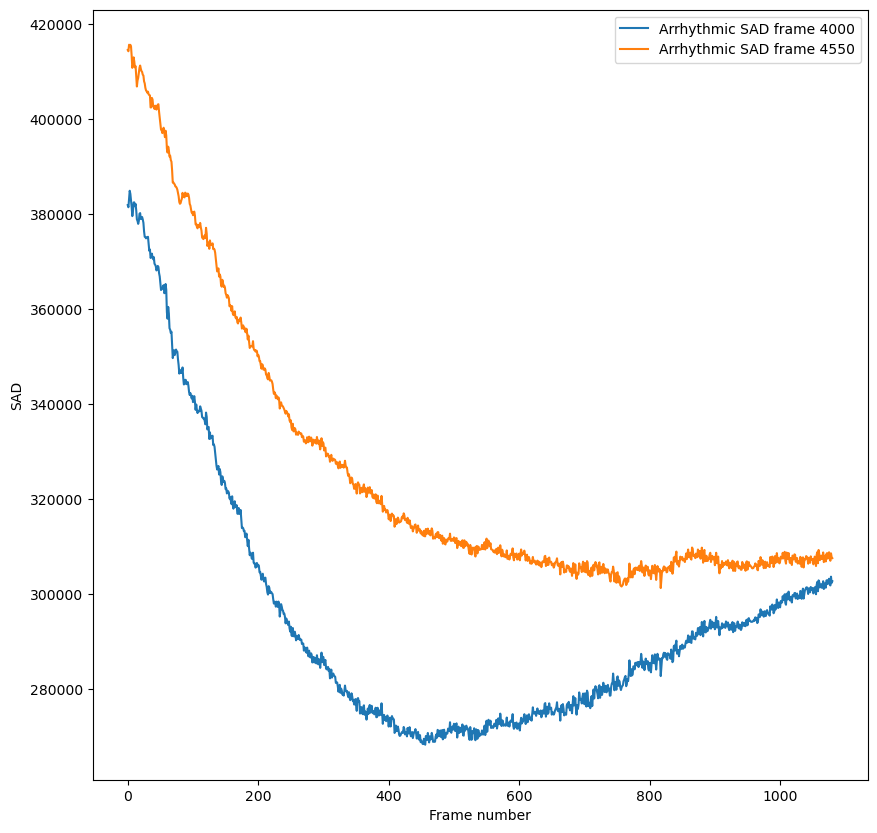

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(oog.arrhythmic_sads[4000], label = "Arrhythmic SAD frame 4000")
plt.plot(oog.arrhythmic_sads[4550], label = "Arrhythmic SAD frame 4550")
plt.legend()
plt.xlabel("Frame number")
plt.ylabel("SAD")
plt.show()

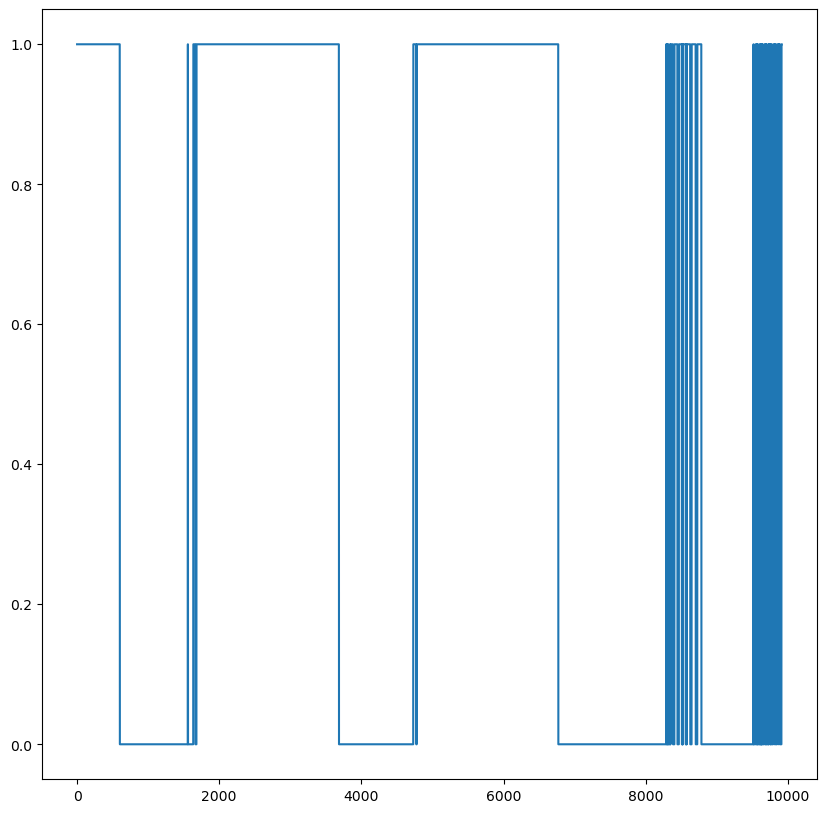

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(np.max(oog.arrhythmic_sads, axis = 1) > np.max(oog.sads, axis = 1))
plt.show()